In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Top 5 zipcodes for 911 calls

In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Top 5 twp(townships) for 911 calls

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
df['title'].nunique()

110

 **Creating new column 'Reason' using 'title' column. In 'title' column, there are reasons/departments specified before title code. These are EMS,Fire and Traffic.

In [10]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

In [11]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

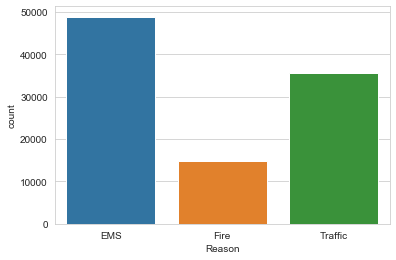

In [13]:
sns.set_style('whitegrid')
sns.countplot(df['Reason'])

**Now lets focus on time information

In [14]:
type(df['timeStamp'][0])

str

**Converting 'timeStamp' column from string to Datetime objects

In [15]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [16]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

**Creating different columns like hour,month,dayofweek using timeStamp column

In [17]:
df['hour']=df['timeStamp'].apply(lambda time: time.hour)
df['month']=df['timeStamp'].apply(lambda time: time.month)
df['dayofweek']=df['timeStamp'].apply(lambda time: time.dayofweek)

In [18]:
df['dayofweek'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

**Here, dayofweek is an integer. Therefore, lets map the dayofweek in its actual string format.

In [19]:
dmap={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['dayofweek']=df['dayofweek'].map(dmap)

In [20]:
df['dayofweek'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

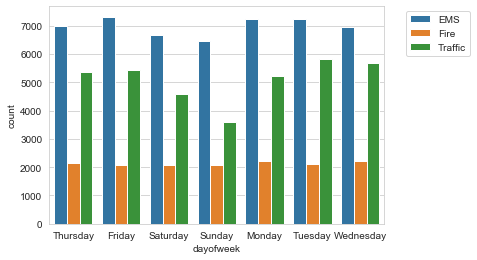

In [21]:
sns.countplot(x='dayofweek',data=df,hue='Reason')
#To relocate the legend
plt.legend(loc="best", bbox_to_anchor=(1.05,1))

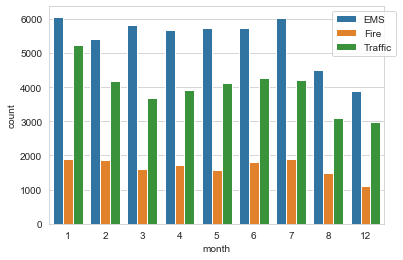

In [22]:
sns.countplot(x='month',data=df,hue='Reason')
plt.legend(loc="best", bbox_to_anchor=(1.05,1))

**The above plot is missing some months. 9,10 and 11 are not there. Let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.

In [23]:
byMonth=df.groupby('month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


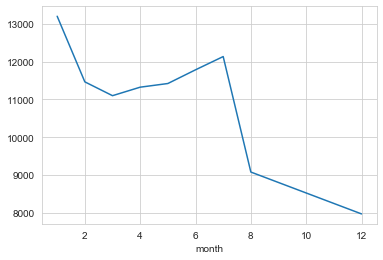

In [24]:
byMonth['lat'].plot()

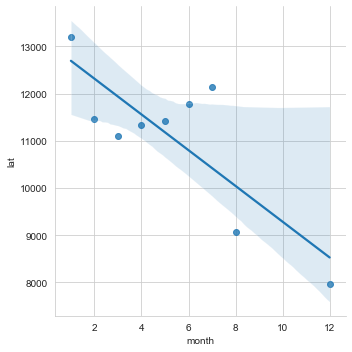

In [25]:
sns.lmplot(x='month',y='lat',data=byMonth.reset_index())

**Lets create a 'date' column that contains date from timeStamp column

In [26]:
df['date']=df['timeStamp'].apply(lambda time: time.date())

In [27]:
df['date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object

**Lets groupby this 'date' column by count() aggregate and create a plot of counts.

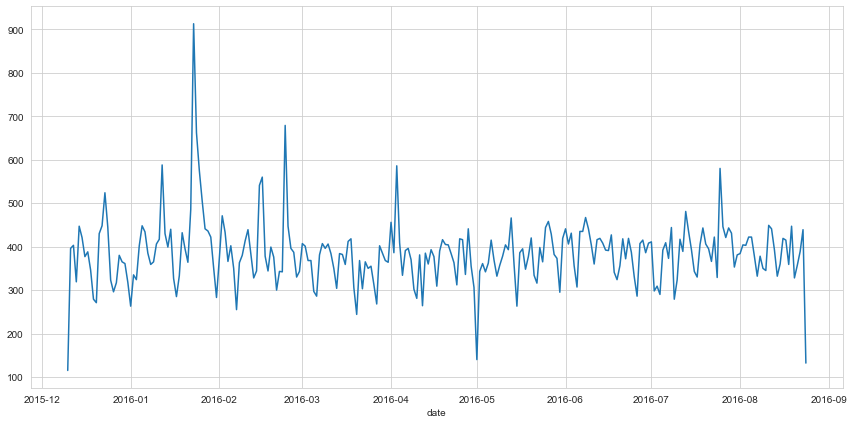

In [60]:
plt.figure(figsize=(12,6))
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

**Lets create 3 seperate plots of count of calls with each plot representing Reason for 911 calls

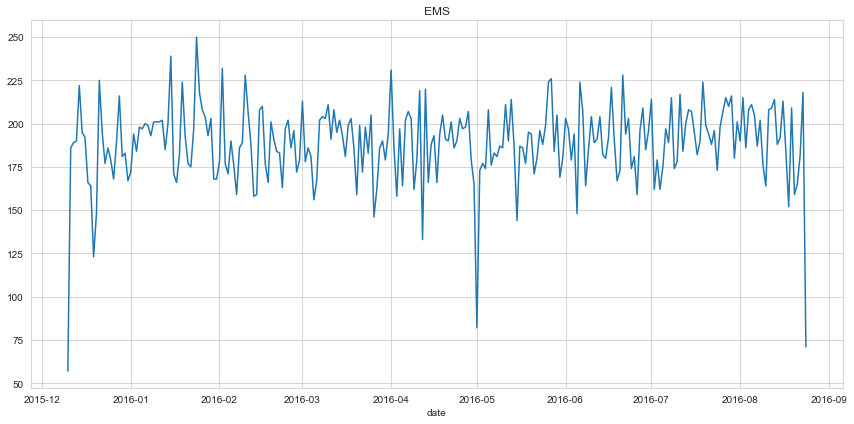

In [41]:
plt.figure(figsize=(12,6))
df[df['Reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

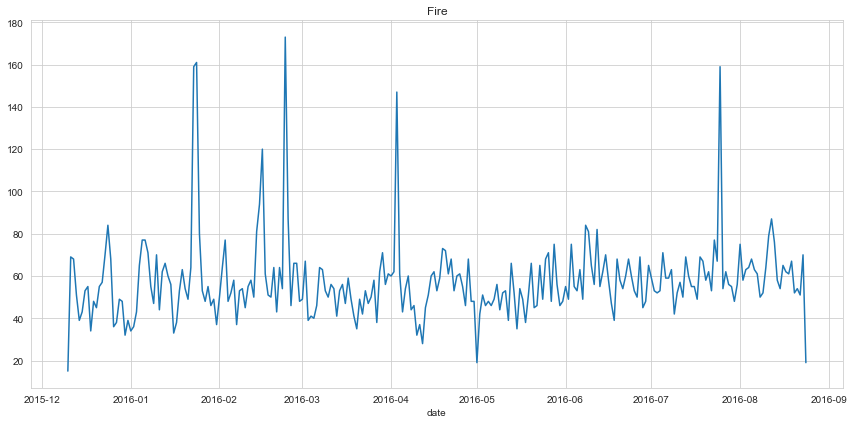

In [40]:
plt.figure(figsize=(12,6))
df[df['Reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

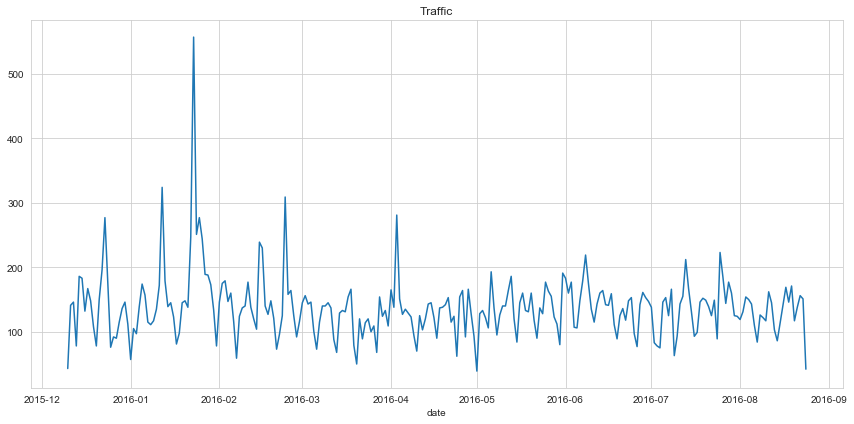

In [39]:
plt.figure(figsize=(12,6))
df[df['Reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

**Lets restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week

In [53]:
dayhour=df.groupby(['dayofweek','hour']).count()['lat'].unstack()
dayhour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


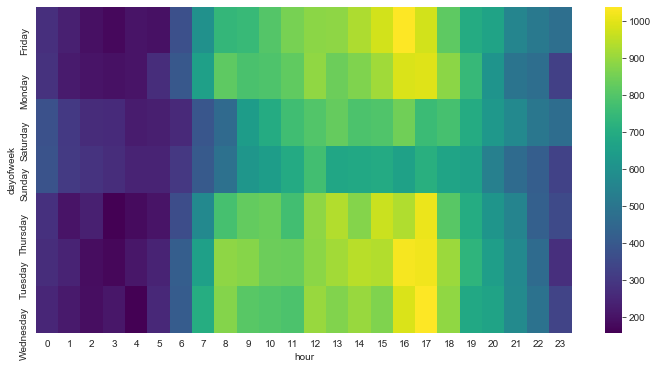

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')

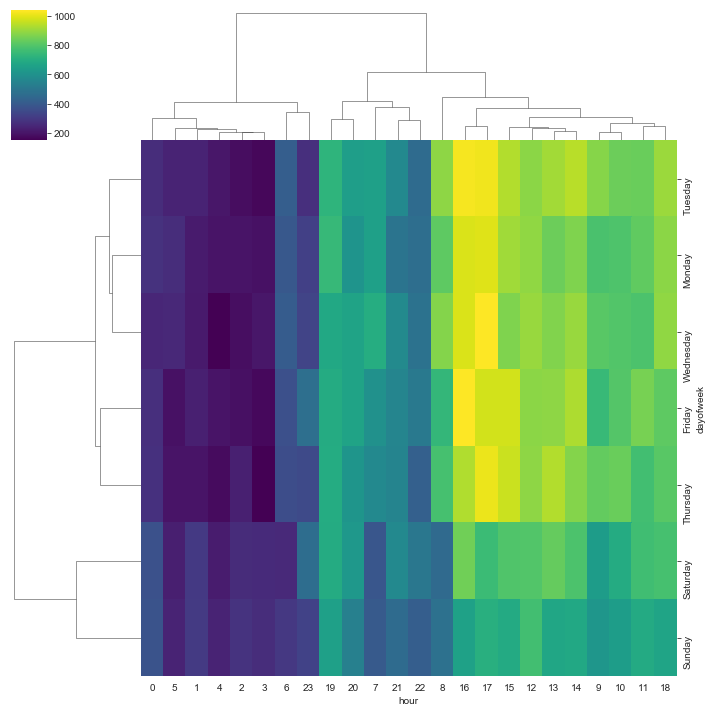

In [55]:
sns.clustermap(dayhour,cmap='viridis')

**Lets restructure the dataframe so that the columns become the Months and the Index becomes the Day of the Week

In [62]:
daymonth=df.groupby(['dayofweek','month']).count()['lat'].unstack()
daymonth

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


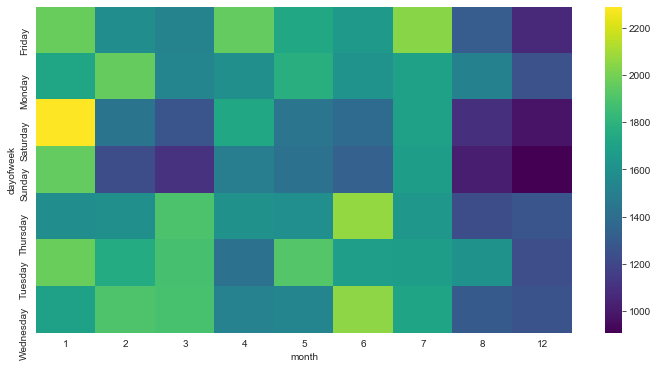

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(daymonth,cmap='viridis')

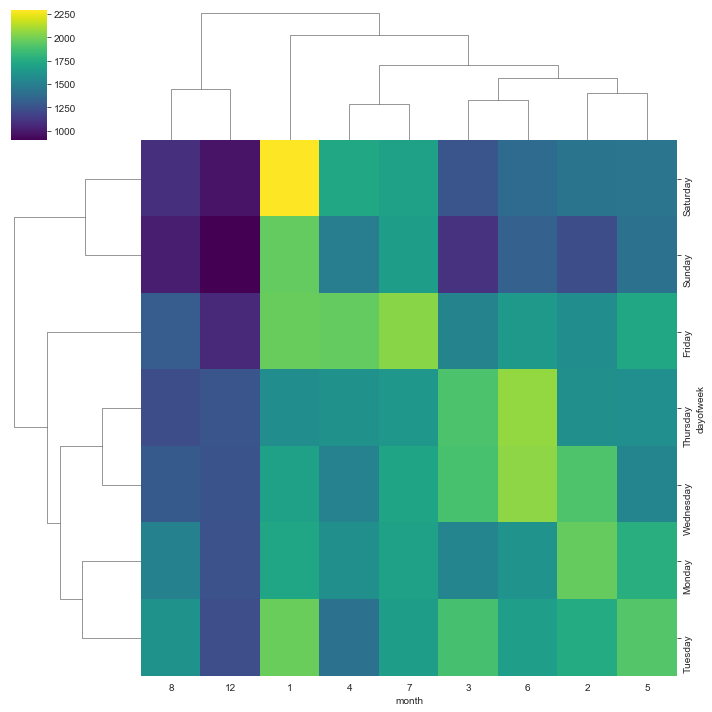

In [64]:
sns.clustermap(daymonth,cmap='viridis')